In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np

In [11]:
root_dir = '/mnt/nfs/home/liglesias/data_acdc'

training_dir = os.path.join(root_dir, "masks_training")
testing_dir = os.path.join(root_dir, "masks_testing")

assert os.path.exists(training_dir), f"El directorio {training_dir} no existe"
assert os.path.exists(testing_dir), f"El directorio {testing_dir} no existe"

def list_nifti_files(directory):
    nifti_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".nii") or file.endswith(".nii.gz"):
                nifti_files.append(os.path.join(root, file))
    return nifti_files

training_files = list_nifti_files(training_dir)
testing_files = list_nifti_files(testing_dir)

print(f"Se encontraron {len(training_files)} archivos en {training_dir}")
print(f"Se encontraron {len(testing_files)} archivos en {testing_dir}")

Se encontraron 200 archivos en /mnt/nfs/home/liglesias/data_acdc/masks_training
Se encontraron 100 archivos en /mnt/nfs/home/liglesias/data_acdc/masks_testing


(216, 256, 10)
(232, 256, 10)
(232, 256, 10)
(256, 256, 10)
(232, 256, 10)


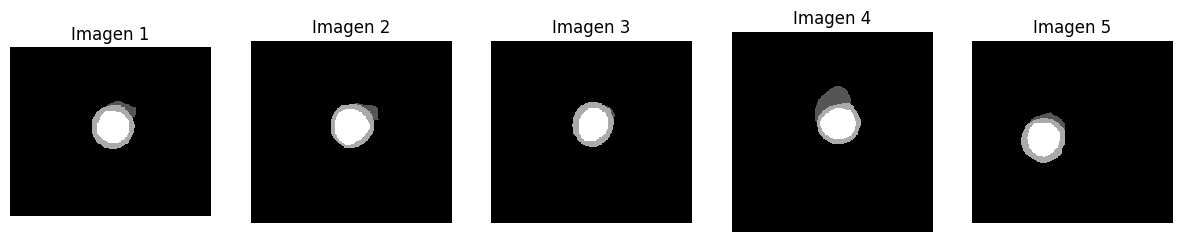

In [12]:
images = [nib.load(file).get_fdata() for file in training_files[:5]] 
fig, axs = plt.subplots(1, len(images), figsize=(15, 5))

for i, img in enumerate(images):
    axs[i].imshow(img[:, :, img.shape[2] // 2], cmap="gray", interpolation='none') 
    axs[i].axis("off") 
    axs[i].set_title(f"Imagen {i+1}")
    print(img.shape)
plt.show()

In [13]:
all_files = training_files + testing_files
images = [nib.load(file).get_fdata() for file in all_files]
image_shapes = [img.shape for img in images]
print(image_shapes)
average_shape = np.mean(image_shapes, axis=0).astype(int)
print(f"Tamaño promedio: {average_shape}")
min_shape = np.min(image_shapes, axis=0)
max_shape = np.max(image_shapes, axis=0)

print(len(all_files))
print(f"Tamaño mínimo: {min_shape}")
print(f"Tamaño máximo: {max_shape}")

[(216, 256, 10), (232, 256, 10), (232, 256, 10), (256, 256, 10), (232, 256, 10), (256, 216, 10), (256, 216, 10), (232, 256, 11), (222, 224, 10), (222, 224, 10), (200, 256, 10), (208, 256, 10), (208, 256, 10), (184, 256, 10), (184, 256, 10), (216, 256, 10), (256, 216, 10), (256, 216, 10), (256, 216, 9), (216, 256, 9), (216, 256, 8), (208, 256, 8), (200, 256, 7), (200, 256, 7), (216, 256, 9), (216, 256, 9), (208, 256, 8), (208, 256, 8), (256, 256, 9), (216, 256, 10), (216, 256, 10), (224, 256, 10), (216, 256, 10), (216, 256, 10), (216, 256, 10), (240, 256, 10), (216, 256, 10), (216, 256, 10), (224, 256, 10), (208, 256, 13), (216, 256, 8), (216, 256, 7), (276, 384, 8), (276, 384, 8), (208, 256, 9), (208, 256, 10), (154, 224, 6), (232, 256, 9), (208, 256, 8), (208, 256, 8), (256, 216, 9), (256, 208, 9), (256, 208, 9), (256, 216, 7), (224, 256, 10), (216, 256, 8), (216, 256, 7), (428, 512, 8), (216, 256, 9), (216, 256, 9), (256, 216, 9), (216, 256, 9), (216, 256, 9), (256, 216, 10), (210, 2

In [14]:
# LINE ADDITION
def add_line_to_image(image, line_position=None, line_thickness=2):
    image_with_line = image.copy()
    
    if line_position is None:
        mask_indices = np.where(image > 0)
        if len(mask_indices[0]) == 0: 
            return image_with_line
        line_position = (mask_indices[0].min() + mask_indices[0].max()) // 2

    start = max(0, line_position - line_thickness // 2)
    end = min(image.shape[0], line_position + line_thickness // 2)
    mask_region = image[start:end, :] > 0
    image_with_line[start:end, :][mask_region] = 1
    return image_with_line

original (216, 256, 10)
original (232, 256, 10)
original (232, 256, 10)
original (256, 256, 10)
original (232, 256, 10)


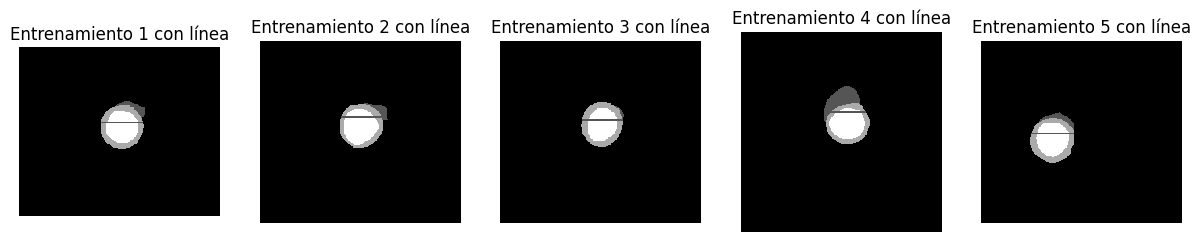

(232, 256, 10)
(232, 256, 10)
(216, 256, 8)
(216, 256, 8)
(216, 256, 9)


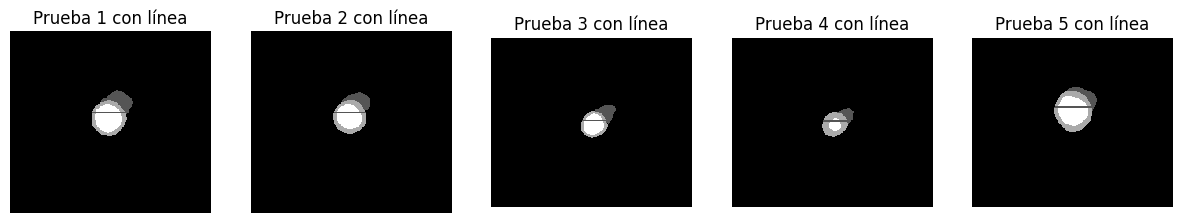

In [15]:
training_files = list_nifti_files(training_dir)
testing_files = list_nifti_files(testing_dir)

training_images =  [nib.load(file) for file in training_files]
testing_images = [nib.load(file) for file in testing_files]

training_images_data = [file.get_fdata() for file in training_images]
testing_images_data = [file.get_fdata() for file in testing_images]

training_images_with_line = [add_line_to_image(img) for img in training_images_data]
testing_images_with_line = [add_line_to_image(img) for img in testing_images_data]

fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, img in enumerate(training_images_with_line[:5]):
    print("original", img.shape)
    axs[i].imshow(img[:, :, img.shape[2] // 2], cmap="gray", interpolation='none')
    axs[i].axis("off")
    axs[i].set_title(f"Entrenamiento {i+1} con línea")
    #print(img.shape)
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, img in enumerate(testing_images_with_line[:5]):
    print(img.shape)
    axs[i].imshow(img[:, :, img.shape[2] // 2], cmap="gray", interpolation='none')
    axs[i].axis("off")
    axs[i].set_title(f"Prueba {i+1} con línea")
    #print(img.shape)
plt.show()

In [16]:
training_output_dir = '/mnt/nfs/home/liglesias/data_acdc/masks_training_noise'
testing_output_dir = '/mnt/nfs/home/liglesias/data_acdc/masks_testing_noise'

os.makedirs(training_output_dir, exist_ok=True)
os.makedirs(testing_output_dir, exist_ok=True)

def save_images_with_line(images, new_data, output_dir, file_names):
    for img, new_data, file_name in zip(images, new_data, file_names):
        nifti_img = nib.Nifti1Image(new_data, img.affine, img.header)
        output_path = os.path.join(output_dir, os.path.basename(file_name))
        nib.save(nifti_img, output_path)
        print(f"Imagen guardada en {output_path}")

save_images_with_line(training_images, training_images_with_line, training_output_dir, training_files)
save_images_with_line(testing_images, training_images_with_line, testing_output_dir, testing_files)

Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient001_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient002_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient002_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient003_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient004_frame15_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient005_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient005_frame13_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient006_frame16_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient007_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise

In [99]:
training_files = list_nifti_files(training_dir)
print(training_dir)

training_path = training_files[0]
print(training_path)

image = nib.load(training_path)
print(type(image))

image_data = image.get_fdata()  # Los datos como array de NumPy
affine = image.affine  # La matriz affine

nifti_img = nib.Nifti1Image(image_data, affine, image.header)
nib.save(nifti_img, "/mnt/nfs/home/liglesias/data_acdc/masks_training_noise/test.nii.gz")


/mnt/nfs/home/liglesias/data_acdc/masks_training
/mnt/nfs/home/liglesias/data_acdc/masks_training/patient001_frame12_gt.nii.gz
<class 'nibabel.nifti1.Nifti1Image'>


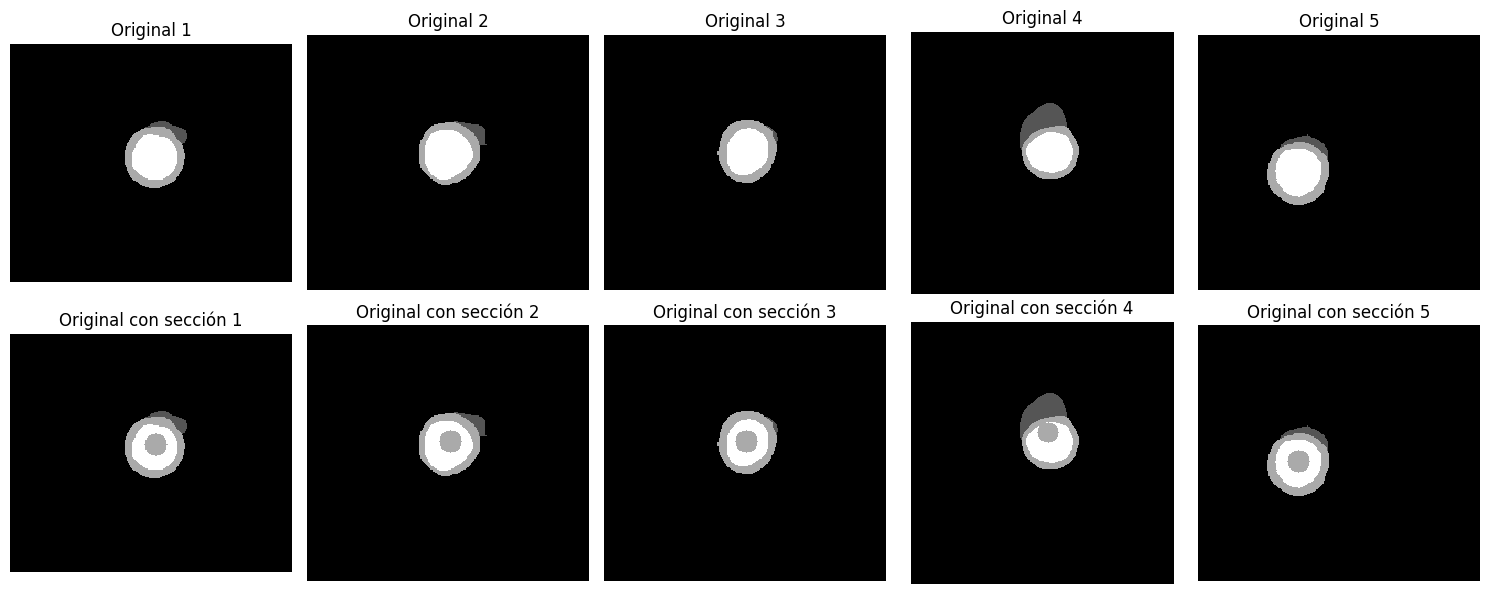

In [83]:
# SECTION ADDITION
import cv2
import nibabel as nib

def add_section_to_nifti_image(img_data, shape='circle', size=10):
    modified_img = img_data.copy()
    height, width, depth = img_data.shape

    for i in range(depth):
        mask = img_data[:, :, i].copy()
        
        coords = np.argwhere(mask > 0)
        if coords.size > 0:
            center_y, center_x = np.mean(coords, axis=0).astype(int)
            if shape == 'circle':
                cv2.circle(mask, (center_x, center_y), size, 2, -1)
            else:
                raise ValueError("Forma no soportada.")
            modified_img[:, :, i] = mask
    return modified_img

def list_nifti_files(directory):
    nifti_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".nii") or file.endswith(".nii.gz"):
                nifti_files.append(os.path.join(root, file))
    return nifti_files

training_files = list_nifti_files(training_dir)
testing_files = list_nifti_files(testing_dir)

training_images = [nib.load(file) for file in training_files]
testing_images = [nib.load(file) for file in testing_files]

training_images_data = [file.get_fdata() for file in training_images]
testing_images_data = [file.get_fdata() for file in testing_images]

section_training_images = [add_section_to_nifti_image(nib.load(file).get_fdata()) for file in training_files]
section_testing_images = [add_section_to_nifti_image(nib.load(file).get_fdata()) for file in testing_files]

n_images_to_show = 5
fig, axs = plt.subplots(2, n_images_to_show, figsize=(15, 6))

for i, file in enumerate(training_files[:n_images_to_show]):
    img_data = nib.load(file).get_fdata()
    axs[0, i].imshow(img_data[:, :, img_data.shape[2] // 2], cmap="gray", interpolation='none')
    axs[0, i].axis("off")
    axs[0, i].set_title(f"Original {i+1}")

for i, img in enumerate(section_training_images[:n_images_to_show]):
    axs[1, i].imshow(img[:, :, img.shape[2] // 2], cmap="gray", interpolation='none')
    axs[1, i].axis("off")
    axs[1, i].set_title(f"Original con sección {i+1}")

plt.tight_layout()
plt.show()

In [84]:
training_output_dir = '/mnt/nfs/home/liglesias/masks_training_circle'
testing_output_dir = '/mnt/nfs/home/liglesias/masks_testing_circle'

os.makedirs(training_output_dir, exist_ok=True)
os.makedirs(testing_output_dir, exist_ok=True)

def save_images(images, new_data, output_dir, file_names):
    for img, new_data, file_name in zip(images, new_data, file_names):
        nifti_img = nib.Nifti1Image(new_data, img.affine, img.header)
        output_path = os.path.join(output_dir, os.path.basename(file_name))
        nib.save(nifti_img, output_path)
        print(f"Imagen guardada en {output_path}")

save_images(training_images, section_training_images, training_output_dir, training_files)
save_images(testing_images, section_testing_images, testing_output_dir, testing_files)

Imagen guardada en /mnt/nfs/home/liglesias/masks_raining_cicle/patient001_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/masks_raining_cicle/patient002_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/masks_raining_cicle/patient002_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/masks_raining_cicle/patient003_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/masks_raining_cicle/patient004_frame15_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/masks_raining_cicle/patient005_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/masks_raining_cicle/patient005_frame13_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/masks_raining_cicle/patient006_frame16_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/masks_raining_cicle/patient007_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/masks_raining_cicle/patient007_frame07_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/masks_raining_cicle/patient008_frame0

In [46]:
training_output_dir = '/mnt/nfs/home/liglesias/data_acdc/masks_training_noise'
testing_output_dir = '/mnt/nfs/home/liglesias/data_acdc/masks_testing_noise'

os.makedirs(training_output_dir, exist_ok=True)
os.makedirs(testing_output_dir, exist_ok=True)

def save_images(images, new_data, output_dir, file_names):
    for img, new_data, file_name in zip(images, new_data, file_names):
        nifti_img = nib.Nifti1Image(new_data, img.affine, img.header)
        output_path = os.path.join(output_dir, os.path.basename(file_name))
        nib.save(nifti_img, output_path)
        print(f"Imagen guardada en {output_path}")

save_images(training_images, section_training_images, training_output_dir, training_files)
save_images(testing_images, section_testing_images, testing_output_dir, testing_files)

Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient001_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient002_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient002_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient003_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient004_frame15_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient005_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient005_frame13_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient006_frame16_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise/patient007_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_noise

original (216, 256, 10)
original (232, 256, 10)
original (232, 256, 10)
original (256, 256, 10)
original (232, 256, 10)
(216, 256, 10)
(232, 256, 10)
(232, 256, 10)
(256, 256, 10)
(232, 256, 10)


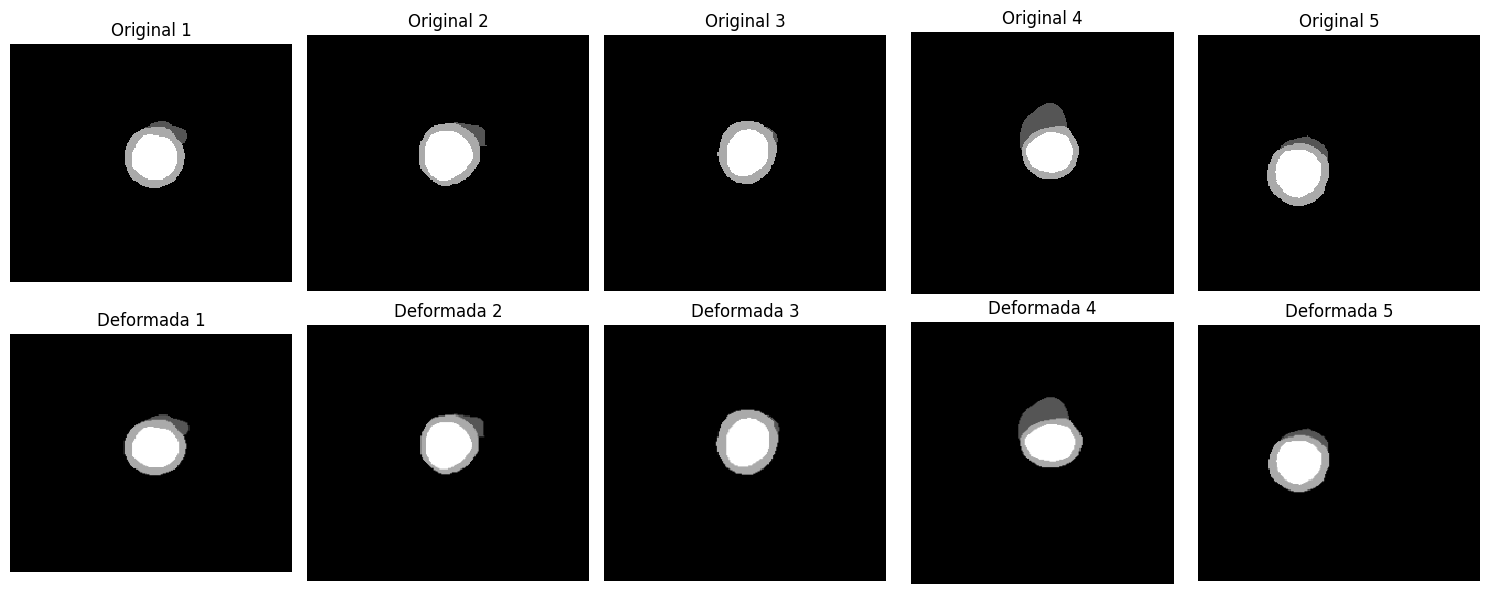

In [ ]:
# FINAL DEFORMATION
from scipy.ndimage import zoom

random.seed(42)

# Apply symetric padding to an image only if the target shape is larger than the original shape, in x and y axis
def symetric_pad_image(img_data, target_shape):
    pad_x = target_shape[0] - img_data.shape[0]
    pad_y = target_shape[1] - img_data.shape[1]
    
    pad_x_before = pad_x // 2
    pad_y_before = pad_y // 2
    
    padded_img = np.zeros(target_shape, dtype=np.float32)
    padded_img[
        pad_x_before:pad_x_before + img_data.shape[0],
        pad_y_before:pad_y_before + img_data.shape[1],
        :img_data.shape[2]
    ] = img_data
    
    return padded_img
    

def symetric_crop_image(img_data, target_shape):
    crop_x = img_data.shape[0] - target_shape[0]
    crop_y = img_data.shape[1] - target_shape[1]
    
    crop_x_before = crop_x // 2 if crop_x > 0 else 0
    crop_y_before = crop_y // 2 if crop_y > 0 else 0
    
    return img_data[
        crop_x_before:crop_x_before + target_shape[0],
        crop_y_before:crop_y_before + target_shape[1],
        :target_shape[2]
    ]
    

def pad_image(img_data, target_shape):
    padded_img = np.zeros(target_shape, dtype=np.float32)
    padded_img[:img_data.shape[0], :img_data.shape[1], :img_data.shape[2]] = img_data
    return padded_img

def deform_nifti_image(img_data, scale_x=1.0, scale_y=1.0):
    original_shape = img_data.shape
    deformed_slices = []
    zoom_factors = (scale_y, scale_x) 

    for i in range(img_data.shape[2]): 
        deformed_slice = zoom(
            img_data[:, :, i],
            zoom_factors,
            order=1,
            mode="constant",
            cval=0 
        )
        deformed_slices.append(deformed_slice)

    deformed_img = np.stack(deformed_slices, axis=2)
    
    deformed_img = symetric_crop_image(deformed_img, original_shape)
    deformed_img = symetric_pad_image(deformed_img, original_shape)
    
    return deformed_img

def list_nifti_files(directory):
    nifti_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".nii") or file.endswith(".nii.gz"):
                nifti_files.append(os.path.join(root, file))
    return nifti_files

# scale_x = 0.8  
# scale_y = 1.2 

training_files = list_nifti_files(training_dir)
testing_files = list_nifti_files(testing_dir)

deformed_training_images = [
    deform_nifti_image(nib.load(file).get_fdata(),
                       scale_x=random_float(0.9, 1.1), 
                       scale_y=random_float(0.9, 1.1))
    for file in training_files
]
deformed_testing_images = [
    deform_nifti_image(nib.load(file).get_fdata(), 
                       scale_x=random_float(0.9, 1.1), 
                       scale_y=random_float(0.9, 1.1))
    for file in testing_files
]

n_images_to_show = 5
fig, axs = plt.subplots(2, n_images_to_show, figsize=(15, 6))

for i, file in enumerate(training_files[:n_images_to_show]):
    img_data = nib.load(file).get_fdata()
    print("original", img_data.shape)
    axs[0, i].imshow(img_data[:, :, img_data.shape[2] // 2], cmap="gray", interpolation="none")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"Original {i+1}")

for i, img in enumerate(deformed_training_images[:n_images_to_show]):
    print(img.shape)
    axs[1, i].imshow(img[:, :, img.shape[2] // 2], cmap="gray", interpolation="none")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"Deformada {i+1}")

plt.tight_layout()
plt.show()

In [20]:
training_output_dir = '/mnt/nfs/home/liglesias/data_acdc/training_deformation_prueba'
testing_output_dir = '/mnt/nfs/home/liglesias/data_acdc/testing_deformation_prueba'

os.makedirs(training_output_dir, exist_ok=True)
os.makedirs(testing_output_dir, exist_ok=True)

def save_images(images, new_data, output_dir, file_names):
    for img, new_data, file_name in zip(images, new_data, file_names):
        nifti_img = nib.Nifti1Image(new_data, img.affine, img.header)
        output_path = os.path.join(output_dir, os.path.basename(file_name))
        nib.save(nifti_img, output_path)
        print(f"Imagen guardada en {output_path}")

save_images(training_images, deformed_training_images, training_output_dir, training_files)
save_images(testing_images, deformed_testing_images, testing_output_dir, testing_files)

Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation_prueba/patient001_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation_prueba/patient002_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation_prueba/patient002_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation_prueba/patient003_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation_prueba/patient004_frame15_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation_prueba/patient005_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation_prueba/patient005_frame13_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation_prueba/patient006_frame16_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation_prueba/patient007_frame01_gt.nii.gz
Imagen gua

original (216, 256, 10)
original (232, 256, 10)
original (232, 256, 10)
original (256, 256, 10)
original (232, 256, 10)
original (256, 216, 10)
original (256, 216, 10)
original (232, 256, 11)
original (222, 224, 10)
original (222, 224, 10)
original (200, 256, 10)
original (208, 256, 10)
original (208, 256, 10)
original (184, 256, 10)
original (184, 256, 10)
original (216, 256, 10)
original (256, 216, 10)
original (256, 216, 10)
original (256, 216, 9)
original (216, 256, 9)
original (216, 256, 8)
original (208, 256, 8)
original (200, 256, 7)
original (200, 256, 7)
original (216, 256, 9)
original (216, 256, 9)
original (208, 256, 8)
original (208, 256, 8)
original (256, 256, 9)
original (216, 256, 10)
original (216, 256, 10)
original (224, 256, 10)
original (216, 256, 10)
original (216, 256, 10)
original (216, 256, 10)
original (240, 256, 10)
original (216, 256, 10)
original (216, 256, 10)
original (224, 256, 10)
original (208, 256, 13)
original (216, 256, 8)
original (216, 256, 7)
origi

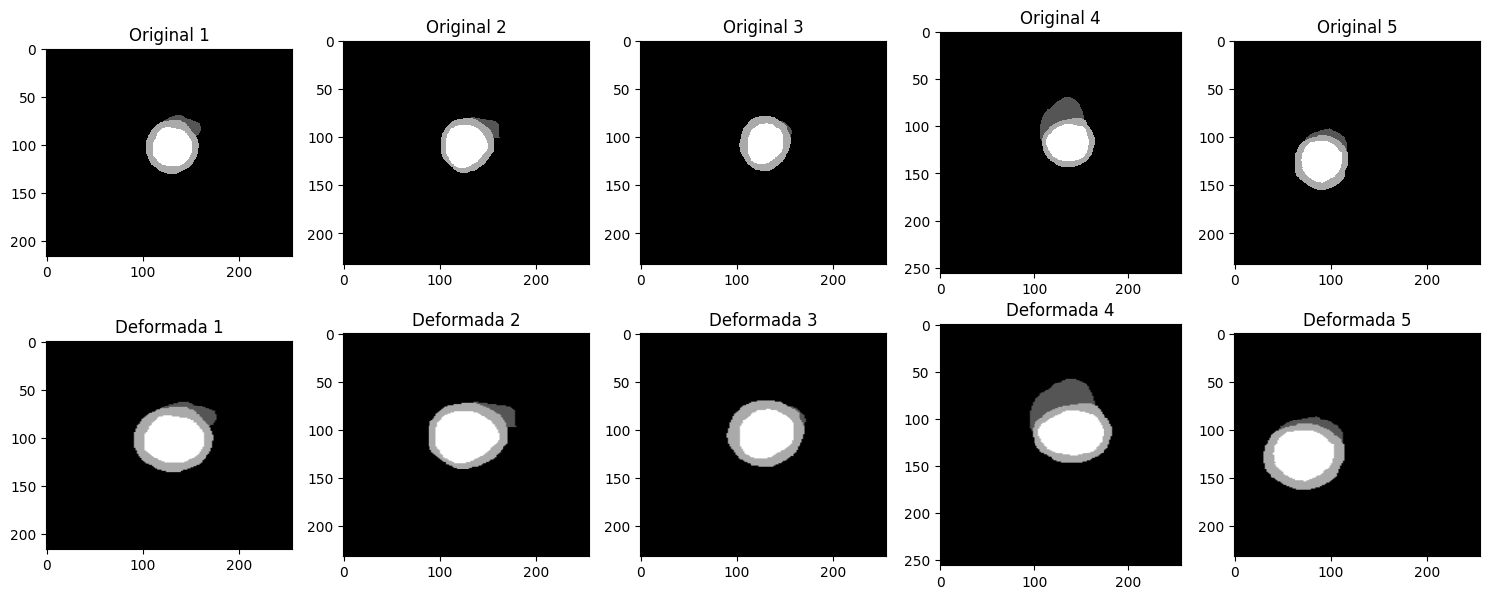

In [14]:
import numpy as np
from scipy.ndimage import zoom
import nibabel as nib
import os
import matplotlib.pyplot as plt

def deform_nifti_image(img_data, scale_x=1.0, scale_y=1.0):
    deformed_slices = []
    zoom_factors = (scale_y, scale_x)

    for i in range(img_data.shape[2]):
        deformed_slice = zoom(
            img_data[:, :, i],
            zoom_factors,
            order=1,
            mode="constant",
            cval=0
        )
        
        crop_x = (deformed_slice.shape[1] - img_data.shape[1]) // 2
        crop_y = (deformed_slice.shape[0] - img_data.shape[0]) // 2
        deformed_slice = deformed_slice[crop_y:crop_y + img_data.shape[0], crop_x:crop_x + img_data.shape[1]]
        
        deformed_slices.append(deformed_slice)

    deformed_img = np.stack(deformed_slices, axis=2)
    return deformed_img

def list_nifti_files(directory):
    nifti_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".nii") or file.endswith(".nii.gz"):
                nifti_files.append(os.path.join(root, file))
    return nifti_files

scale_x = 1.5
scale_y = 1.2

training_files = list_nifti_files(training_dir)
testing_files = list_nifti_files(testing_dir)

deformed_training_images = [
    deform_nifti_image(nib.load(file).get_fdata(), scale_x=scale_x, scale_y=scale_y)
    for file in training_files
]
deformed_testing_images = [
    deform_nifti_image(nib.load(file).get_fdata(), scale_x=scale_x, scale_y=scale_y)
    for file in testing_files
]

for i, file in enumerate(training_files[:]):
    img_data = nib.load(file).get_fdata()
    print("original", img_data.shape)

for i, img in enumerate(deformed_training_images[:]):
    print(img.shape)


n_images_to_show = 5
fig, axs = plt.subplots(2, n_images_to_show, figsize=(15, 6))

for i, file in enumerate(training_files[:n_images_to_show]):
    img_data = nib.load(file).get_fdata()
    print("original", img_data.shape)
    axs[0, i].imshow(img_data[:, :, img_data.shape[2] // 2], cmap="gray", interpolation="none")
    # axs[0, i].axis("off")
    axs[0, i].set_title(f"Original {i+1}")

for i, img in enumerate(deformed_training_images[:n_images_to_show]):
    print(img.shape)
    axs[1, i].imshow(img[:, :, img.shape[2] // 2], cmap="gray", interpolation="none")
    # axs[1, i].axis("off")
    axs[1, i].set_title(f"Deformada {i+1}")

plt.tight_layout()
plt.show()

In [74]:
training_output_dir = '/mnt/nfs/home/liglesias/data_acdc/training_deformation'
testing_output_dir = '/mnt/nfs/home/liglesias/data_acdc/testing_deformation'

os.makedirs(training_output_dir, exist_ok=True)
os.makedirs(testing_output_dir, exist_ok=True)

def save_images(images, new_data, output_dir, file_names):
    for img, new_data, file_name in zip(images, new_data, file_names):
        nifti_img = nib.Nifti1Image(new_data, img.affine, img.header)
        output_path = os.path.join(output_dir, os.path.basename(file_name))
        nib.save(nifti_img, output_path)
        print(f"Imagen guardada en {output_path}")

save_images(training_images, deformed_training_images, training_output_dir, training_files)
save_images(testing_images, deformed_testing_images, testing_output_dir, testing_files)

Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation/patient001_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation/patient002_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation/patient002_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation/patient003_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation/patient004_frame15_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation/patient005_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation/patient005_frame13_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation/patient006_frame16_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation/patient007_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/training_deformation

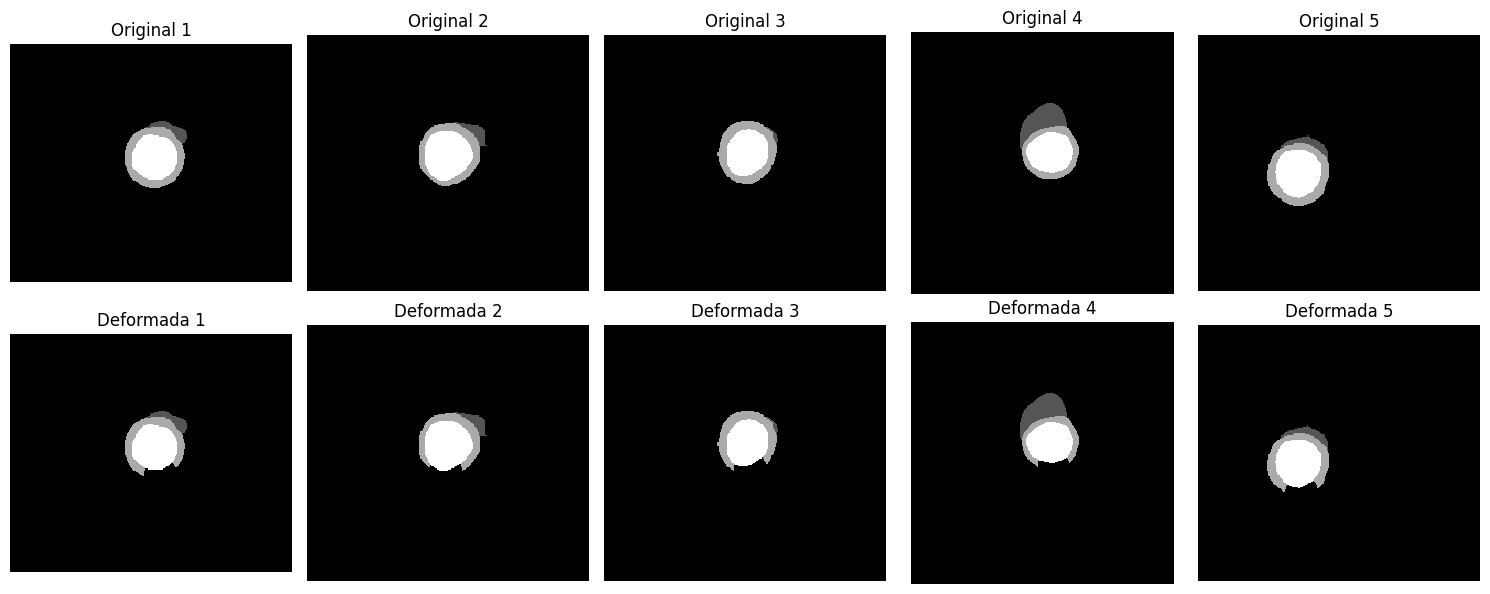

In [ ]:
# SPHERE ADDITION IN CENTRAL SLICES (In the ventricle area, it remains ventricle, and in the myocardium area, it becomes background)
import raster_geometry as rg
import cv2

def add_sphere_to_nifti_image(img_data, sphere_radius=10, background_value=0, central_slices_range=2):
    shape = img_data.shape
    central_slice_index = shape[2] // 2
    modified_slices = []
    
    slice_data = img_data[:, :, central_slice_index + 1]
    mask = slice_data.copy()
    coords = np.argwhere(mask > background_value)
    if coords.size == 0:
        modified_slices.append(slice_data)
    
    edge_position = coords[-1]
    
    position = (edge_position[0] / shape[0], edge_position[1] / shape[1], 0.5)
    
    for i in range(img_data.shape[2]):
        slice_data = img_data[:, :, i]
        
        if central_slice_index - central_slices_range <= i <= central_slice_index + central_slices_range:
            distance_from_central = abs(central_slice_index - i)
            adjusted_radius = sphere_radius * (1 - (distance_from_central / (central_slices_range + 1)))
            
            sphere = rg.sphere(shape=shape, radius=adjusted_radius, position=position).astype(int) * 2
            
            modified_slice = np.where((sphere[:, :, i] == 2) & (slice_data == 2), 0, slice_data)
            modified_slice = np.where((sphere[:, :, i] == 2) & (slice_data == 3), 3, modified_slice)
        else:
            modified_slice = slice_data
        
        modified_slices.append(modified_slice)

    modified_img = np.stack(modified_slices, axis=2)
    return modified_img

def list_nifti_files(directory):
    nifti_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".nii") or file.endswith(".nii.gz"):
                nifti_files.append(os.path.join(root, file))
    return nifti_files

sphere_radius = 15
n_images_to_show = 5
background_value = 0
central_slices_range = 2 

training_files = list_nifti_files(training_dir)
testing_files = list_nifti_files(testing_dir)

modified_training_images = [
    add_sphere_to_nifti_image(nib.load(file).get_fdata(), sphere_radius=sphere_radius, background_value=background_value, central_slices_range=central_slices_range)
    for file in training_files
]
modified_testing_images = [
    add_sphere_to_nifti_image(nib.load(file).get_fdata(), sphere_radius=sphere_radius, background_value=background_value, central_slices_range=central_slices_range)
    for file in testing_files
]

fig, axs = plt.subplots(2, n_images_to_show, figsize=(15, 6))

for i, file in enumerate(training_files[:n_images_to_show]):
    img_data = nib.load(file).get_fdata()
    axs[0, i].imshow(img_data[:, :, img_data.shape[2] // 2], cmap="gray", interpolation="none")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"Original {i+1}")

for i, img in enumerate(modified_training_images[:n_images_to_show]):
    axs[1, i].imshow(img[:, :, img.shape[2] // 2], cmap="gray", interpolation="none")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"Deformada {i+1}")

plt.tight_layout()
plt.show()

In [19]:
training_output_dir = '/mnt/nfs/home/liglesias/data_acdc/masks_training_sphere'
testing_output_dir = '/mnt/nfs/home/liglesias/data_acdc/masks_testing_sphere'

os.makedirs(training_output_dir, exist_ok=True)
os.makedirs(testing_output_dir, exist_ok=True)

def save_images(images, new_data, output_dir, file_names):
    for img, new_data, file_name in zip(images, new_data, file_names):
        nifti_img = nib.Nifti1Image(new_data, img.affine, img.header)
        output_path = os.path.join(output_dir, os.path.basename(file_name))
        nib.save(nifti_img, output_path)
        print(f"Imagen guardada en {output_path}")

save_images(training_images, modified_training_images, training_output_dir, training_files)
save_images(testing_images, modified_testing_images, testing_output_dir, testing_files)

Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_sphere/patient001_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_sphere/patient002_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_sphere/patient002_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_sphere/patient003_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_sphere/patient004_frame15_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_sphere/patient005_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_sphere/patient005_frame13_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_sphere/patient006_frame16_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_sphere/patient007_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_train

original (216, 256, 10)
original (232, 256, 10)
original (232, 256, 10)
original (256, 256, 10)
original (232, 256, 10)
(216, 256, 10)
(232, 256, 10)
(232, 256, 10)
(256, 256, 10)
(232, 256, 10)


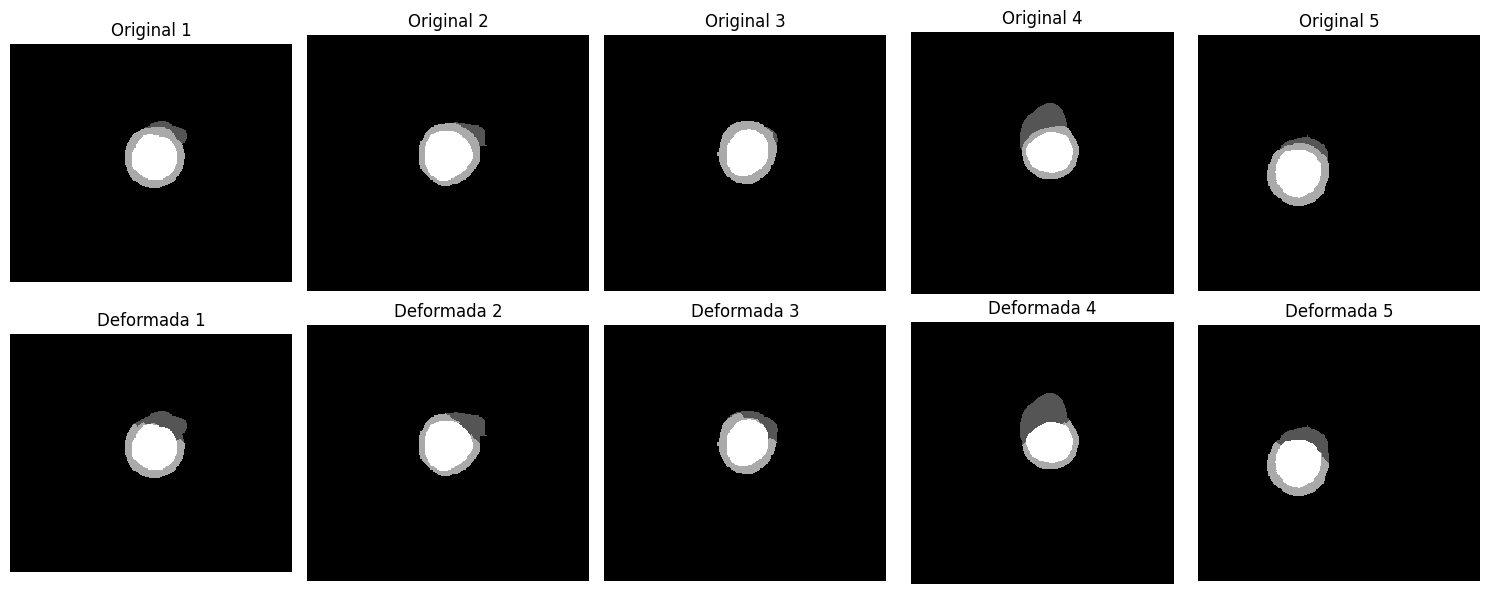

In [ ]:
from scipy.ndimage import binary_dilation

def process_labels(img_data, dilation_iterations=3):
    mask_label_1 = (img_data == 1)
    dilated_mask_label_1 = binary_dilation(mask_label_1, iterations=dilation_iterations)
    
    mask_label_2 = (img_data == 2)
    intersection_mask = dilated_mask_label_1 & mask_label_2
    
    img_data[intersection_mask] = 1
    
    return img_data

def list_nifti_files(directory):
    nifti_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".nii") or file.endswith(".nii.gz"):
                nifti_files.append(os.path.join(root, file))
    return nifti_files

dilation_iterations = 6
n_images_to_show = 5

modified_training_images = [
    process_labels(nib.load(file).get_fdata(), dilation_iterations=dilation_iterations)
    for file in training_files
]
modified_testing_images = [
    process_labels(nib.load(file).get_fdata(), dilation_iterations=dilation_iterations)
    for file in testing_files
]

fig, axs = plt.subplots(2, n_images_to_show, figsize=(15, 6))

for i, file in enumerate(training_files[:n_images_to_show]):
    img_data = nib.load(file).get_fdata()
    print("original", img_data.shape)
    axs[0, i].imshow(img_data[:, :, img_data.shape[2] // 2], cmap="gray", interpolation="none")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"Original {i+1}")

for i, img in enumerate(modified_training_images[:n_images_to_show]):
    print(img.shape)
    axs[1, i].imshow(img[:, :, img.shape[2] // 2], cmap="gray", interpolation="none")
    axs[1, i].axis("off")
    axs[1, i].set_title(f"Deformada {i+1}")

plt.tight_layout()
plt.show()

In [80]:
for i, img in enumerate(modified_training_images[:]):
    print(img.shape)

(216, 256, 10)
(232, 256, 10)
(232, 256, 10)
(256, 256, 10)
(232, 256, 10)
(256, 216, 10)
(256, 216, 10)
(232, 256, 11)
(222, 224, 10)
(222, 224, 10)
(200, 256, 10)
(208, 256, 10)
(208, 256, 10)
(184, 256, 10)
(184, 256, 10)
(216, 256, 10)
(256, 216, 10)
(256, 216, 10)
(256, 216, 9)
(216, 256, 9)
(216, 256, 8)
(208, 256, 8)
(200, 256, 7)
(200, 256, 7)
(216, 256, 9)
(216, 256, 9)
(208, 256, 8)
(208, 256, 8)
(256, 256, 9)
(216, 256, 10)
(216, 256, 10)
(224, 256, 10)
(216, 256, 10)
(216, 256, 10)
(216, 256, 10)
(240, 256, 10)
(216, 256, 10)
(216, 256, 10)
(224, 256, 10)
(208, 256, 13)
(216, 256, 8)
(216, 256, 7)
(276, 384, 8)
(276, 384, 8)
(208, 256, 9)
(208, 256, 10)
(154, 224, 6)
(232, 256, 9)
(208, 256, 8)
(208, 256, 8)
(256, 216, 9)
(256, 208, 9)
(256, 208, 9)
(256, 216, 7)
(224, 256, 10)
(216, 256, 8)
(216, 256, 7)
(428, 512, 8)
(216, 256, 9)
(216, 256, 9)
(256, 216, 9)
(216, 256, 9)
(216, 256, 9)
(256, 216, 10)
(210, 224, 8)
(210, 224, 8)
(240, 256, 9)
(240, 256, 9)
(256, 216, 10)
(

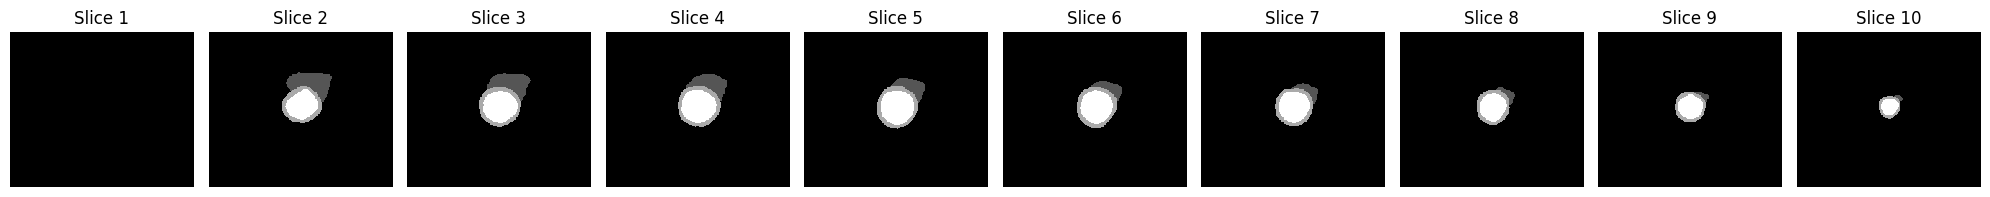

In [ ]:
image_filename = 'patient001_frame01_gt.nii'
image_file_path = None

for file in training_files:
    if image_filename in file:
        image_file_path = file
        break

if image_file_path:
    first_image = nib.load(image_file_path).get_fdata()
    n_slices = first_image.shape[2]

    fig, axs = plt.subplots(1, n_slices, figsize=(20, 5))
    for i in range(n_slices):
        axs[i].imshow(first_image[:, :, i], cmap="gray", interpolation="none")
        axs[i].axis("off")
        axs[i].set_title(f"Slice {i+1}")

    plt.tight_layout()
    plt.show()
else:
    print(f'El archivo {image_filename} no se encontró en los archivos de entrenamiento.')

In [52]:
training_output_dir = '/mnt/nfs/home/liglesias/data_acdc/masks_training_dilation'
testing_output_dir = '/mnt/nfs/home/liglesias/data_acdc/masks_testing_dilation'

os.makedirs(training_output_dir, exist_ok=True)
os.makedirs(testing_output_dir, exist_ok=True)

def save_images(images, new_data, output_dir, file_names):
    for img, new_data, file_name in zip(images, new_data, file_names):
        nifti_img = nib.Nifti1Image(new_data, img.affine, img.header)
        output_path = os.path.join(output_dir, os.path.basename(file_name))
        nib.save(nifti_img, output_path)
        print(f"Imagen guardada en {output_path}")

save_images(training_images, modified_training_images, training_output_dir, training_files)
save_images(testing_images, modified_testing_images, testing_output_dir, testing_files)

Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_dilation/patient001_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_dilation/patient002_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_dilation/patient002_frame12_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_dilation/patient003_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_dilation/patient004_frame15_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_dilation/patient005_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_dilation/patient005_frame13_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_dilation/patient006_frame16_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/data_acdc/masks_training_dilation/patient007_frame01_gt.nii.gz
Imagen guardada en /mnt/nfs/home/liglesias/dat